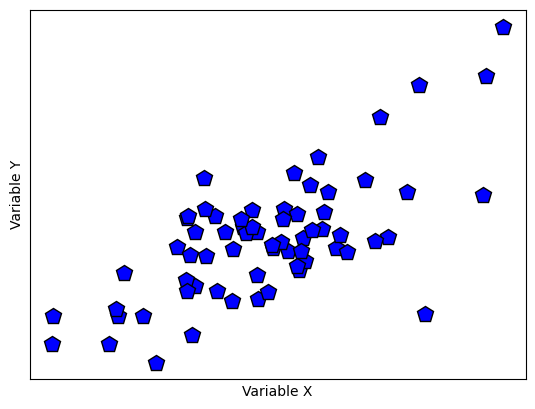

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


N = 66

x = np.random.randn(N)
y = x + np.random.randn(N)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
meanX = np.mean(x)
meanY = np.mean(y)

covar1 = 0
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY)
    

covar1 = covar1/(N-1)
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N-1)
covar3 = np.cov(np.vstack((x,y)))

print(covar1, covar2, covar3)

0.7577734022189391 0.7577734022189393 [[0.84297675 0.7577734 ]
 [0.7577734  1.43463454]]


In [7]:
corr_num = sum( (x-meanX) * (y-meanY) )
corr_den = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = corr_num/np.sqrt(corr_den)


corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1, corr2)

0.6890661517522259 [[1.         0.68906615]
 [0.68906615 1.        ]]


0.6943464293672811


/tmp/ipykernel_175481/3461071793.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  tmatrix[ri,ni] = num/den
/tmp/ipykernel_175481/3461071793.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)


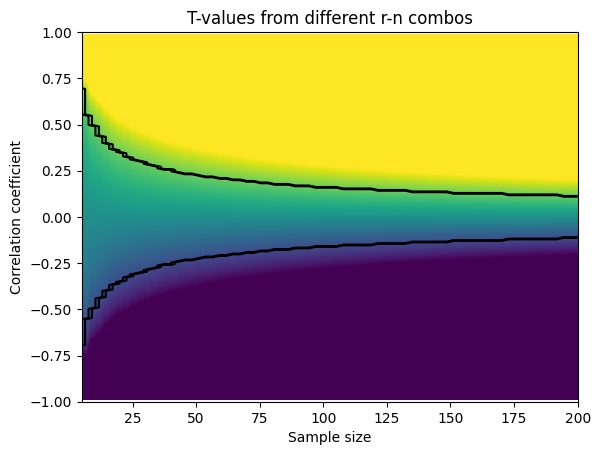

In [11]:
xn = stats.zscore(x,ddof=1)
yn = stats.zscore(y)

corr3 = np.dot(xn,yn) / (N-1)

print(corr3)

r = np.linspace(-1,1,248)
n = np.round( np.linspace(5,200,73) )

tmatrix = np.zeros((len(r),len(n)))
pmatrix = np.zeros((len(r),len(n)))

for ri in range(len(r)):
    for ni in range(len(n)):
        
        num = r[ri]*np.sqrt(n[ni]-2)
        den = 1-r[ri]**2
        
        tmatrix[ri,ni] = num/den
        pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)
        
        
plt.imshow(tmatrix,vmin=-3,vmax=3,extent=[n[0],n[-1],r[0],r[-1]],aspect='auto',origin='lower')
plt.contour(pmatrix<.05,1,colors='k',extent=[n[0],n[-1],r[0],r[-1]])
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')
plt.show()


In [10]:
r, p = stats.pearsonr(x,y)
print(r, p)

0.6890661517522259 1.5920516194534324e-10
